# Overview
The topic for this week is the wave equation which is a partial differential equation involving position and time.  Some of the skills you'll need to do the problems this week are:

1. Discrete Fourier Transforms.
2. Making plots into movies.


### Fourier Transforms

By now you should know that any function can be written as a sum of
sine and cosine functions.  More precisely, if $f(t)$ is defined on
the interval $0 \le x < \tau$, we can express this function as:

$$f(t) = \sum_{k=0}^{\infty} \alpha_k \cos{ \frac{2 \pi k t}{\tau}} + \sum_{k=1}^{\infty} \beta_k \sin{ \frac{2 \pi k t}{\tau}} $$

We can compress the notation by using the following identities:
$\cos\theta ={1\over 2}\left( e^{-i\theta} + e^{i \theta}\right)$ and $\sin\theta
={1\over 2}i \left(e^{-i\theta} - e^{i \theta}\right)$.  Upon collecting like
terms, the equation above becomes:

$$f(t) = \sum_{k=-\infty}^{\infty} \gamma_k e^{i \frac{2 \pi k t}{\tau}}\label{eq:FourierComplex} \tag{1}$$

with

$$\gamma_k = 
\begin{cases}
{1\over 2} \left( \alpha_{-k} + i \beta_{-k}\right) & \mathrm{~if~~} k < 0\\
\alpha_0 & \mathrm{~if~~} k = 0\\
{1\over 2} \left( \alpha_{k} - i \beta_{k}\right) & \mathrm{~if~~} k > 0\\
\end{cases}$$


Finding the coefficients ($\gamma_k$) in equation
\ref{eq:FourierComplex} is valuable because it helps us know which of
the sine and cosine functions should be included in the expansion.
Or, to put it another way, if we knew which coefficients were not
zero, we would know which frequencies were present in the function
$f(t)$.  

The standard approach to finding the $\gamma_k$ is to exploit the
orthogonality of the functions $e^{i \frac{2 \pi k t}{\tau}}$.  If we
multiply both sides of equation \ref{eq:FourierComplex} by $e^{-i
  \frac{2 \pi k' t}{\tau}}$ and integrate both sides, we get:
$$\begin{align}
\int_0^\tau f(t) e^{-i
  \frac{2 \pi k' t}{\tau}}dt &= \sum_{k=-\infty}^{\infty} \gamma_k
\int_0^\tau e^{i \frac{2 \pi k t}{\tau}}e^{-i
  \frac{2 \pi k' t}{\tau}} dt\\
\int_0^\tau f(t) e^{-i
  \frac{2 \pi k' t}{\tau}}dt &= \sum_{k=-\infty}^{\infty} \gamma_k
\int_0^\tau e^{i \frac{2 \pi (k-k') t}{\tau}} dt \label{eq:FourierTrick} \tag{2}
\end{align}$$


The integral on the right hand side of Eq. \ref{eq:FourierTrick} will
be zero unless $k = k'$.

Since all of the integrals in the sum evaluate to zero except when $k
= k'$, the sum essentially collapses down to one term and equation
\ref{eq:FourierTrick} becomes:
\begin{equation}
\int_0^\tau f(t) e^{-i
  \frac{2 \pi k' t}{\tau}}dt = \tau \gamma_k'
\end{equation}
 and we can solve for $\gamma_k$:
\begin{equation}\label{eq:gamma} \tag{3}
\gamma_k = {1 \over \tau} \int_0^\tau f(t) e^{-i
  \frac{2 \pi k t}{\tau}}dt 
\end{equation}

### Discrete Fourier Transforms
Equation \ref{eq:gamma} is great if **you know the function
  $f(t)$**.  However, there are many situations when, instead of knowing
the function you simply have **samples of the function at regular intervals**:
$$f(t_n) $$
where 
$$t_n = \frac{n}{N} \tau$$

in this case, the integral in equation \ref{eq:gamma} becomes a sum
over the function samples:

$$\begin{equation}\label{eq:Discretegamma} \tag{4}
\gamma_k = {1 \over N} \sum_0^N f(t_n) e^{-i
  \frac{2 \pi k n}{N}}dt 
\end{equation}
$$



Let's try equation \ref{eq:Discretegamma} out on a simple
example to get a feel for how it works.  We'll start by working with
a simple one-frequency function and show the code for calculating the fourier transform of it.

$$\begin{equation}\label{eq:samplingFunction}
f(t) = \sin(5 \times 2 \pi t)
\end{equation}
$$


1. <span style="color:red">Execute the cell, observe the results and draw a conclusion. </span>
2. <span style="color:red">Now increase the frequency of the function you are sampling until you notice that the fourier transform is unable to correctly identify the signal present. </span>
3.  <span style="color:red">Slowly increase the sampling frequency (variable 'fS' below) until you notice that the fourier transform is once again able to correctly identify the frequency in the signal. Draw a general conclusion and write it in the cell below. </span>
4. <span style="color:red">What is the relationship between the number of function samples and the number of $\gamma_k$ we can extract? Chat with your neighbors about it and write your conclusion down. </span>
5. <span style="color:red">When plotting a discrete fourier transform, how do you scale the horizontal axis so that you get correct frequency information. Study the code and draw a conclusion.</span>
6. <span style="color:red">Now modify your original function so that it is the sum of two sinusiodal functions, each with a different frequency.  Then ensure that your discrete fourier transform correctly identifies both frequencies. </span>




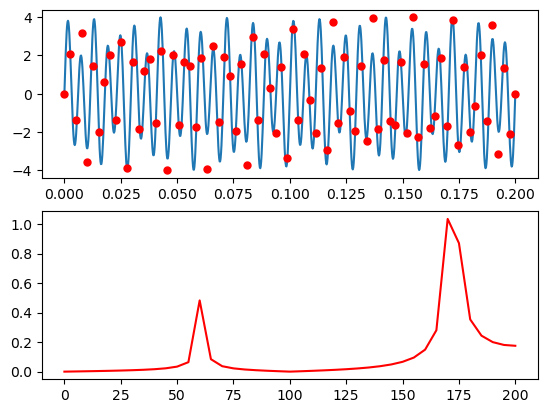

In [20]:
%matplotlib inline
from numpy import linspace,sin,pi,abs
from matplotlib import pyplot

def DFT(samples):
    from numpy import exp
    N = len(samples)
    gamma = []
    for k in range(N//2+1):
        gammaK = 0
        for n,yn in enumerate(samples):
            gammaK += yn * exp(-2j * pi * k * n/N )
        gamma.append(gammaK/N)

    return gamma


fS = 400  #Rate at which I sample the function
dt = 1/fS  # time between adjacent samples
samplingTime = 0.2  # How long do I sample my function
nSamples = int(samplingTime/dt)  # How many samples am I going to take


t = linspace(0,samplingTime,nSamples) #Location of samples in domain
denset = linspace(0,samplingTime,1000)
f = sin(60 * 2 * pi * t) + 3 * sin(170 * 2 * pi * t) # Function samples
densef = sin(100 * 2 * pi * denset) + 3 * sin(170 * 2 * pi * denset) # Function samples
gamma = DFT(f)

k = linspace(0,fS//2,nSamples//2+1)

fig,(ax1,ax2) = pyplot.subplots(2,1)

ax1.plot(denset, densef)
ax1.plot(t, f, 'r.', ms = 10)
ax2.plot(k, abs(gamma), 'r-')
pyplot.show()




## Conclusions

According to the cell above, the sampling frequency needs to be around doulbe that of the frequency being sampled. Where the sampling frequency is about 100, the maximum frequency it can reasonably catch in the transform is around 50 Hz. Around 60 Hz, the transform is not accurate anymore but increasing sampling frequency to 120 seems to fix the issue.

On another note, the relation between number of samples and number of Gamma coefficients seems to be related by a factor of 2. This is likely because we need at least two points on a sinudoial wave to fully define its frequency, while the phase can be arbitrary. This goes to show the strength of the Fourier Transform where phase shifts in wave patterns do not affect the output.

To properly plot a Fourier Tranform, we only want to plot the R.H.S. of it where $0 \leq k \leq \infty$. It is important to note that $k$ represents teh frequencies in Hz, not in radians per second.

Let's take a minute to point out some important items about discrete Fourier transforms:

1. Recall that when given a set of $N$ equations with $N$ unknowns, you can extract values for all $N$ variables. In a similar fashion, if we use $N$ samples from a function and use them to perform a DFT, we should be able to extract $N$ pieces of information.  Since the $\gamma_k$ are complex numbers (two pieces of information for each $\gamma_k$), we can only calculate ${N\over 2}$ of them.  Anything beyond that will be redundant information.
2. The rate at which you sample the function (i.e. $f_\text{sampling}$) determines the max frequency that can be detected.  More specifically, $f_\text{max} = {f_\text{sampling}\over 2}$. For example, if you want to detect a $100$ Hz signal, you must sample the function with at least $200$ Hz frequency. 
3. When plotting a discrete fourier transform, the horizontal axis is frequency and the vertial axis is the amount of that frequency in the signal.  The horizontal axis should be scaled so that the minimum frequency is zero and the max is ${f_\text{sampling}\over 2}$.  (linspace works well for this)
4. Numpy has a discrete fourier transform algorithm that is optimized for speed.  It can be found in numpy.fft.

### Making plots into movies.

This week we will be solving partial differential equations involving space ($x$) and time ($t$), and it will often be useful to watch your solution evolve in time instead of just looking at a snapshot of your solution at the end.  To get practice with doing this, consider the following function:

$$y(x,t) = 5 \sin( 3x) \exp(-2 t)$$

Below you will find some code for making a movie of this function.



In [21]:
%matplotlib osx
from matplotlib import pyplot as plt
from numpy import linspace,sin,exp,sqrt

t = 0
dt = 0.05
x = linspace(0,10,100)
t = 0

while t < 10:
    
    y = 5 * sin(3 * x) * exp(-2 * t)
    plt.plot(x,y,'r-')
    plt.ylim(-5,5)
    plt.draw()
    plt.pause(0.0001)
    plt.clf()
    t += dt
        

SystemError: null argument to internal routine

<span style="color:red">Last week you learned how to plot functions of two variables.  Use what you just learned to try and animate a function of two variables:

$$f(x,y) =\sin(x+ 6t)  \cos(y - 3 t)$$

In [25]:
%matplotlib osx
import numpy as np

x = linspace(-5.0, 5.0, 100)
y = linspace(-5.0, 5.0, 100)
X, Y = np.meshgrid(x, y)
fig = plt.figure()
ax = fig.add_subplot(projection = '3d')

f = lambda x, y, t: np.sin(x + 6 * t) * np.cos(y - 3 * t)

t = 0.0
while t < 10.0:
    ax.plot_surface(X, Y, f(X, Y, t))
    fig.canvas.draw()
    plt.pause(1e-4)
    ax.cla()
    t += 0.1

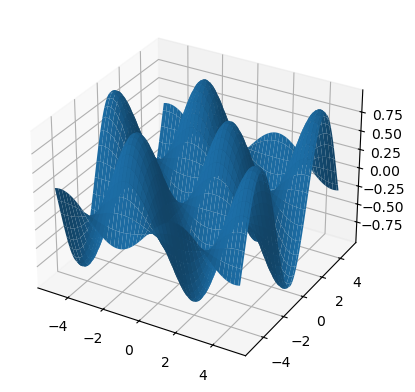

In [32]:
%matplotlib inline
import numpy as np

x = linspace(-5.0, 5.0, 100)
y = linspace(-5.0, 5.0, 100)
X, Y = np.meshgrid(x, y)
fig = plt.figure()
ax = fig.add_subplot(projection = '3d')

f = lambda x, y, t: np.sin(x + 6 * t) * np.cos(y - 3 * t)

t = 0.0
while t < 10.0:
    ax.plot_surface(X, Y, f(X, Y, t))
    fig.canvas.draw()
    plt.pause(1e-4)
    ax.cla()
    t += 0.1